In [8]:
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point

<Axes: >

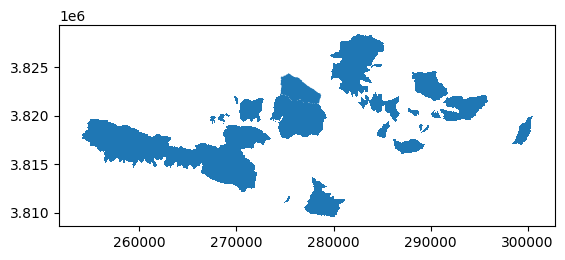

In [7]:
#shp = gpd.read_file('/Volumes/PhD/imagery/masters/ROC/r_stations.shp')
shp_path = r'/Volumes/PhD/imagery/masters/TF_basin-TPN/OneDrive_1_11-7-2024/TF_TP-basins.shp'
shp = gpd.read_file(shp_path)
shp.plot()

<Axes: >

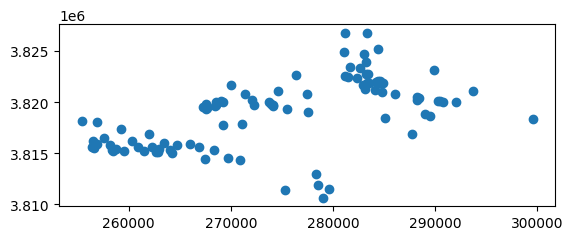

In [10]:
shp_c = shp.centroid
shp_c.plot()

In [14]:
basin_coords = list(zip(shp_c.geometry.x, shp_c.geometry.y))
